# Temperature Forecast Project using ML

# Project Description:


This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T



# Problem Statement:

The task is to develop separate machine learning models to predict the next-day maximum and minimum temperatures in Seoul, South Korea, based on various weather and geographic variables available in the dataset. The dataset contains summer weather data from 2013 to 2017, consisting of inputs such as present-day temperatures, LDAPS model forecasts, and geographic auxiliary variables.

# Objective:
Build predictive models to forecast Next-Day Maximum (Next_Tmax) and Minimum (Next_Tmin) air temperatures accurately using historical weather data and model predictions.

Trained machine learning models for Next_Tmax and Next_Tmin prediction.

Model performance metrics and evaluation results.

Documentation and insights regarding feature importance and model analysis.

Deployed models ready for real-world temperature forecasting based on new input data.

The goal is to create accurate and reliable predictive models that could assist in improving the forecast of next-day maximum and minimum temperatures, aiding in better decision-making for various applications, especially in the field of meteorology and climate science.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Load Dataset

In [2]:
df = pd.read_csv('temp_forecast.csv')


In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
df.shape

(7752, 25)

In [7]:
# Splitting the Date column into day, month, and year

df[["day", "Month", "Year"]] = df['Date'].str.split("-", expand=True)

df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,Month,Year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


In [8]:
# Dropping the original 'day' column
df.drop('Date', axis=1, inplace=True)


In [9]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30,06,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30,06,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30,06,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30,06,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30,08,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30,08,2017
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30,08,2017
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [10]:
 #Checking for the missing (or null) values.

df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
day                  2
Month                2
Year                 2
dtype: int64

In [11]:
# Checking for the datatype of the columns:

df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
day                  object
Month                object
Year                 object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


There are missing values in the dataset.

Numeric Columns ('float64'): 24 columns
    
Categorical or Non-Numeric Columns ('object'): 3 columns (day, Month, Year)

In [13]:
# Dropping rows with any missing values in the DataFrame
df.dropna(inplace=True)





In [14]:
# Checking for the missing values again

df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
Month               0
Year                0
dtype: int64

# Data Visualization

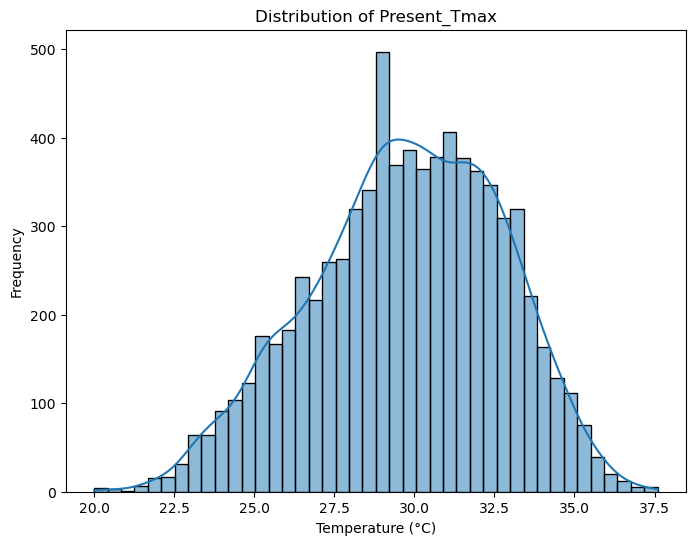

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for 'Present_Tmax'
plt.figure(figsize=(8, 6))
sns.histplot(df['Present_Tmax'], kde=True)
plt.title('Distribution of Present_Tmax')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


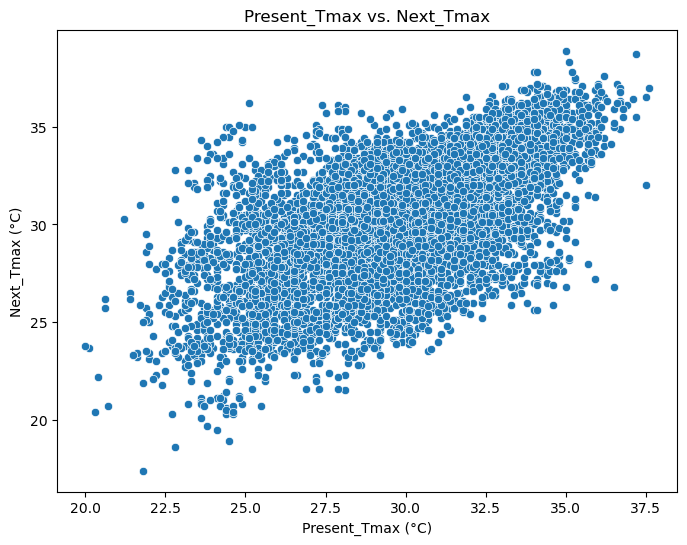

In [16]:
# Example: Scatter plot for 'Present_Tmax' vs. 'Next_Tmax'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Present_Tmax', y='Next_Tmax', data=df)
plt.title('Present_Tmax vs. Next_Tmax')
plt.xlabel('Present_Tmax (°C)')
plt.ylabel('Next_Tmax (°C)')
plt.show()




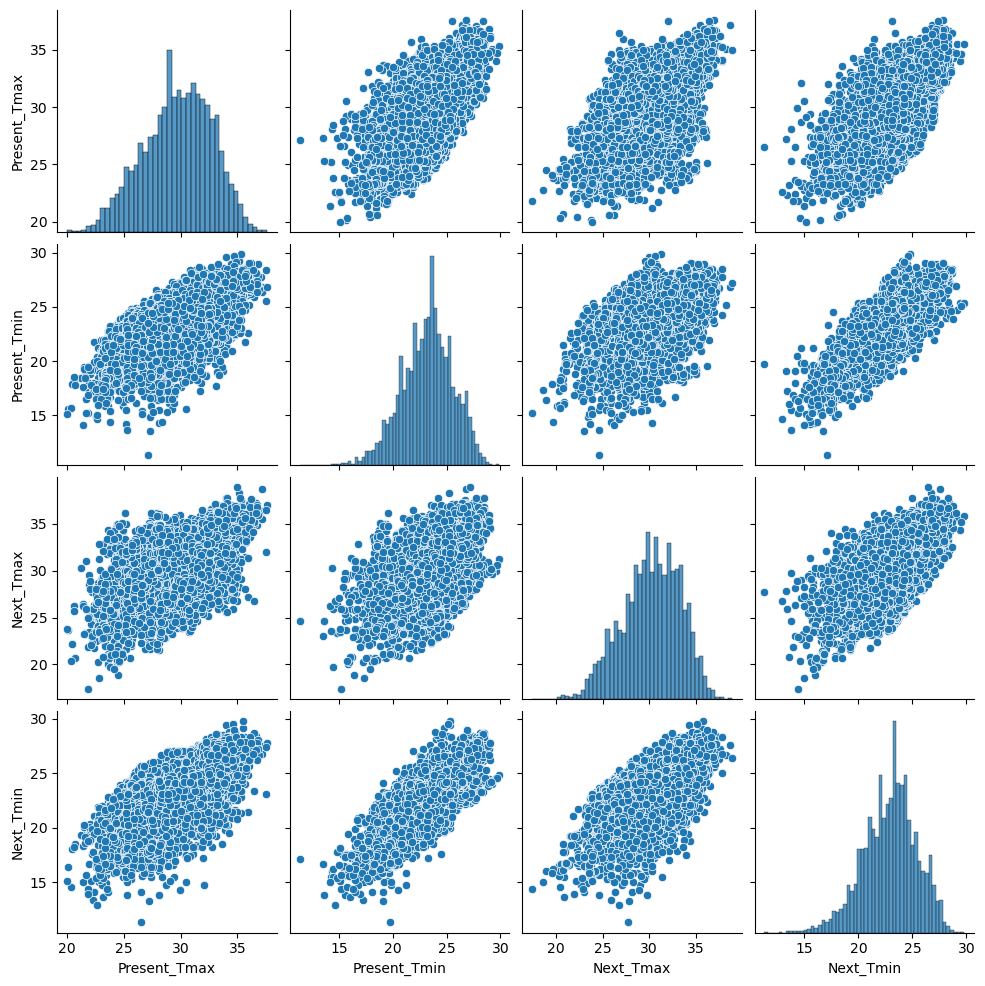

In [17]:
# Example: Pairplot for a subset of numerical columns
sns.pairplot(df[['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']])
plt.show()


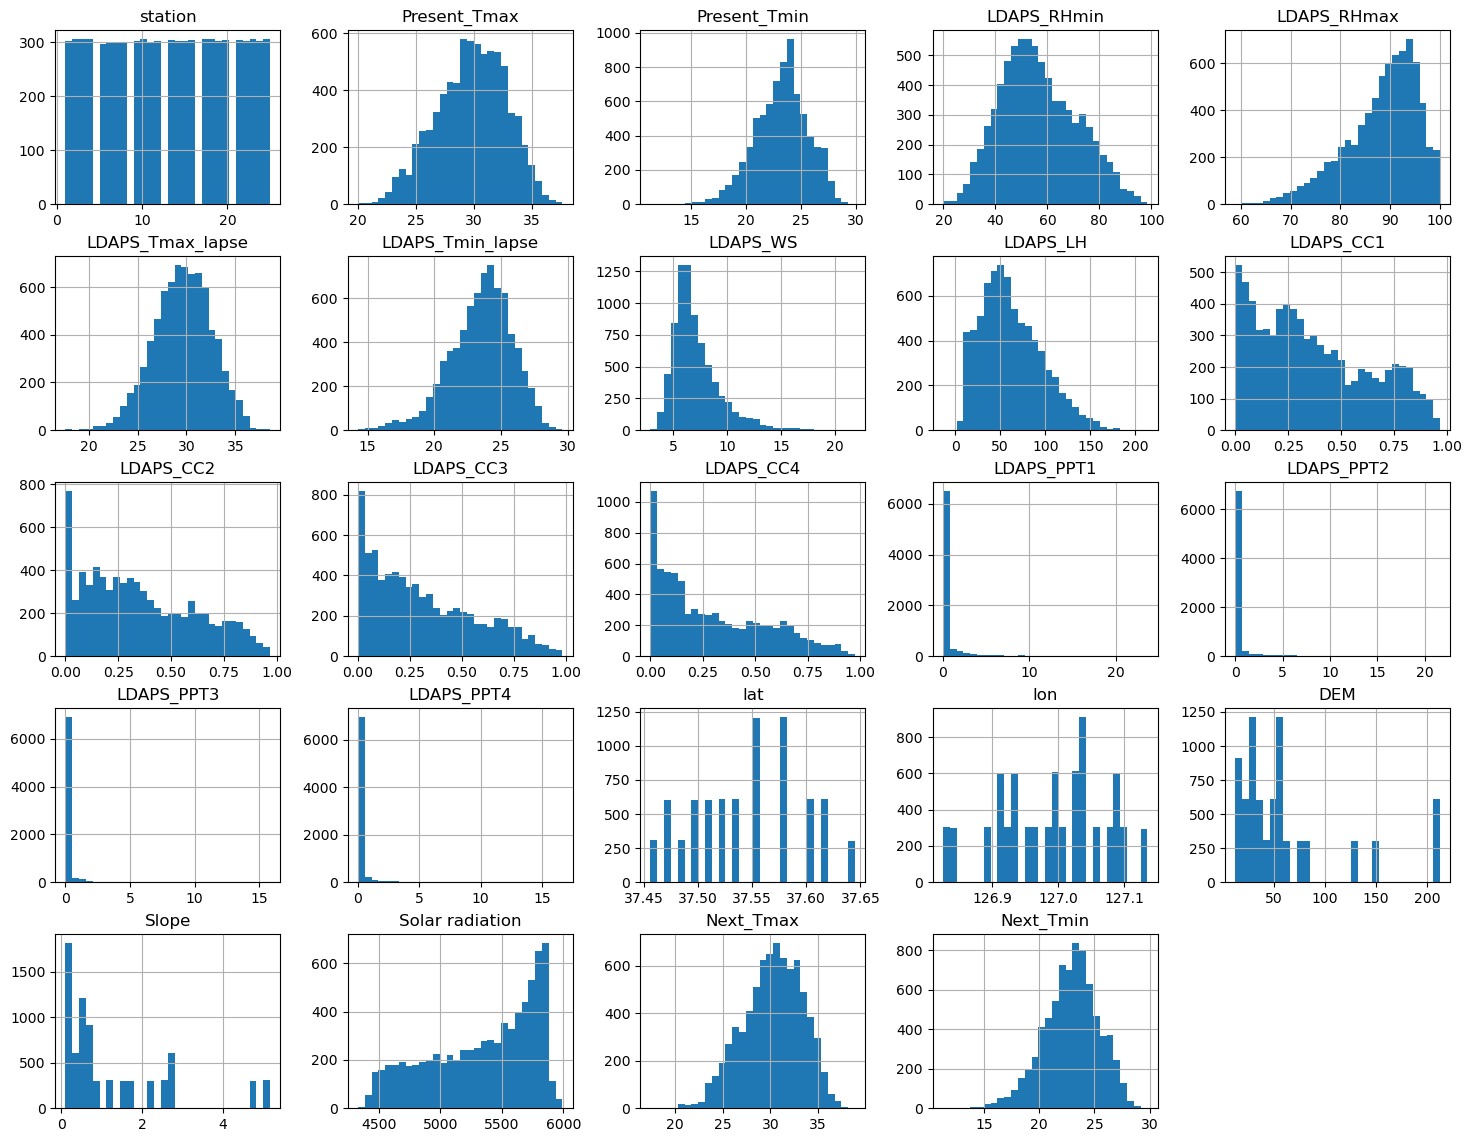

In [18]:
# Plotting the histogram for univariant analysis to check the normal distribution

df.hist(figsize=[18,14], bins=30, grid=True)
plt.show()

# statistical summary

In [19]:
# Checking for the description of the dataset

df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


# Correlation

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


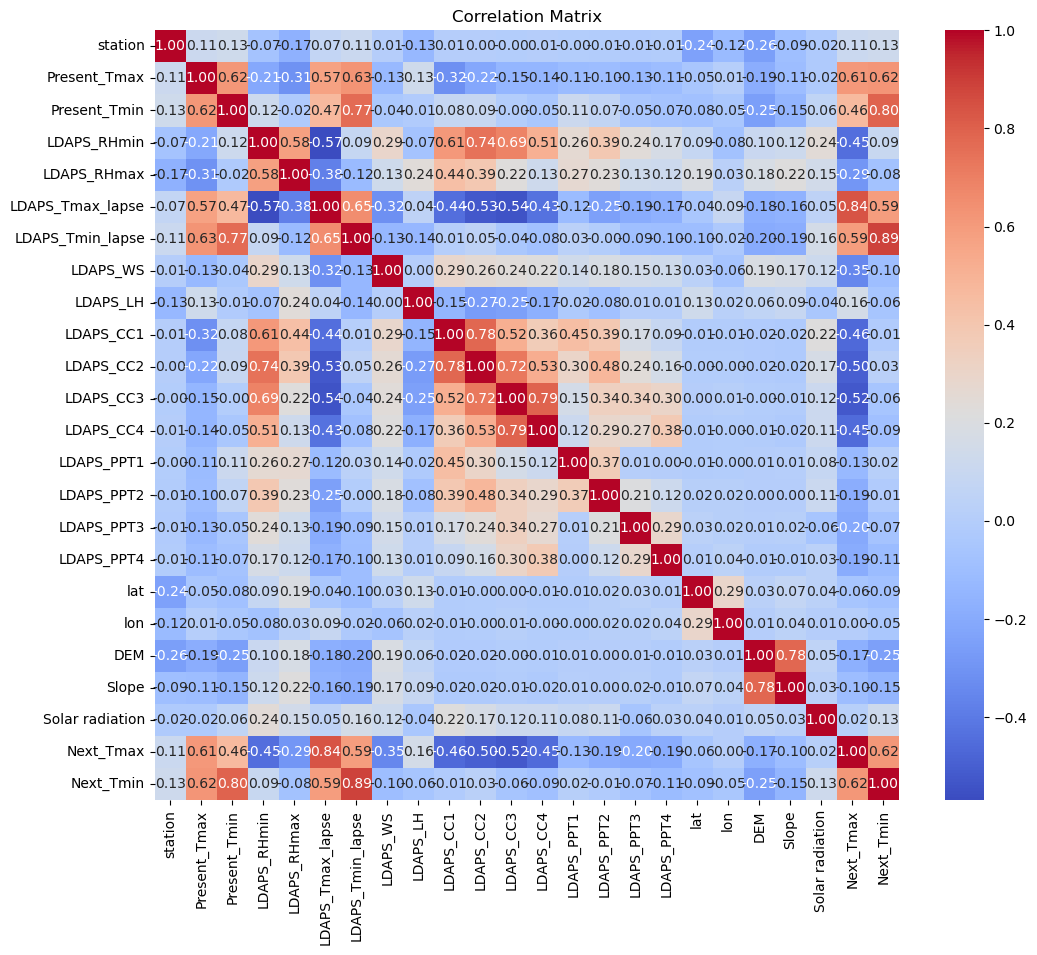

In [21]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [22]:


corr_matrix = df.corr()
# Sorting correlation as per the Next_Tmax target column

corr_matrix = df.corr()
corr_matrix['Next_Tmax'].sort_values(ascending = False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835729
Next_Tmin           0.616629
Present_Tmax        0.610357
LDAPS_Tmin_lapse    0.592119
Present_Tmin        0.463523
LDAPS_LH            0.156779
station             0.107747
Solar radiation     0.016145
lon                 0.003502
lat                -0.055367
Slope              -0.104279
LDAPS_PPT1         -0.125954
DEM                -0.174578
LDAPS_PPT2         -0.186722
LDAPS_PPT4         -0.190720
LDAPS_PPT3         -0.203554
LDAPS_RHmax        -0.289788
LDAPS_WS           -0.351107
LDAPS_RHmin        -0.446824
LDAPS_CC4          -0.454039
LDAPS_CC1          -0.459705
LDAPS_CC2          -0.498295
LDAPS_CC3          -0.523061
Name: Next_Tmax, dtype: float64

In [23]:
# Sorting correlation as per the Next_Tmin target column

corr_matrix = df.corr()
corr_matrix['Next_Tmin'].sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886513
Present_Tmin        0.796975
Present_Tmax        0.621048
Next_Tmax           0.616629
LDAPS_Tmax_lapse    0.589963
station             0.128184
Solar radiation     0.125517
LDAPS_RHmin         0.093249
LDAPS_CC2           0.030358
LDAPS_PPT1          0.018031
LDAPS_PPT2         -0.012462
LDAPS_CC1          -0.012877
lon                -0.045758
LDAPS_CC3          -0.056490
LDAPS_LH           -0.060392
LDAPS_PPT3         -0.068664
LDAPS_RHmax        -0.076415
lat                -0.085136
LDAPS_CC4          -0.086197
LDAPS_WS           -0.102021
LDAPS_PPT4         -0.114900
Slope              -0.148379
DEM                -0.249303
Name: Next_Tmin, dtype: float64

For 'Next_Tmax':

Positive Correlations:

Present_Tmax: Moderately positively correlated (0.61): Higher present maximum temperature relates to a higher next-day maximum temperature.
LDAPS_Tmax_lapse: Moderately positively correlated (0.59): Lapse-rate adjusted forecast of next-day maximum temperature has a positive relationship.
        
        
Negative Correlations:

LDAPS_RHmin: Weak negative correlation (-0.45): Lower forecast of next-day minimum relative humidity relates to a higher next-day maximum temperature.
LDAPS_RHmax: Weak negative correlation (-0.29): Lower forecast of next-day maximum relative humidity relates to a higher next-day maximum temperature.

For 'Next_Tmin':

Positive Correlations:

Present_Tmin: Strongly positively correlated (0.80): Higher present minimum temperature relates to a higher next-day minimum temperature.
LDAPS_Tmin_lapse: Strongly positively correlated (0.89): Lapse-rate adjusted forecast of next-day minimum temperature has a strong positive relationship.
        
Negative Correlations:

LDAPS_RHmin: Weak negative correlation (0.09): Lower forecast of next-day minimum relative humidity relates to a higher next-day minimum temperature.
        
Solar radiation: Weak positive correlation (0.02): Higher solar radiation relates slightly to a higher next-day minimum temperature.

# skewness

In [24]:
# Splitting the independent feature and target columns

x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [25]:
 x.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
day                -0.010718
Month              -0.174856
Year                0.013575
dtype: float64

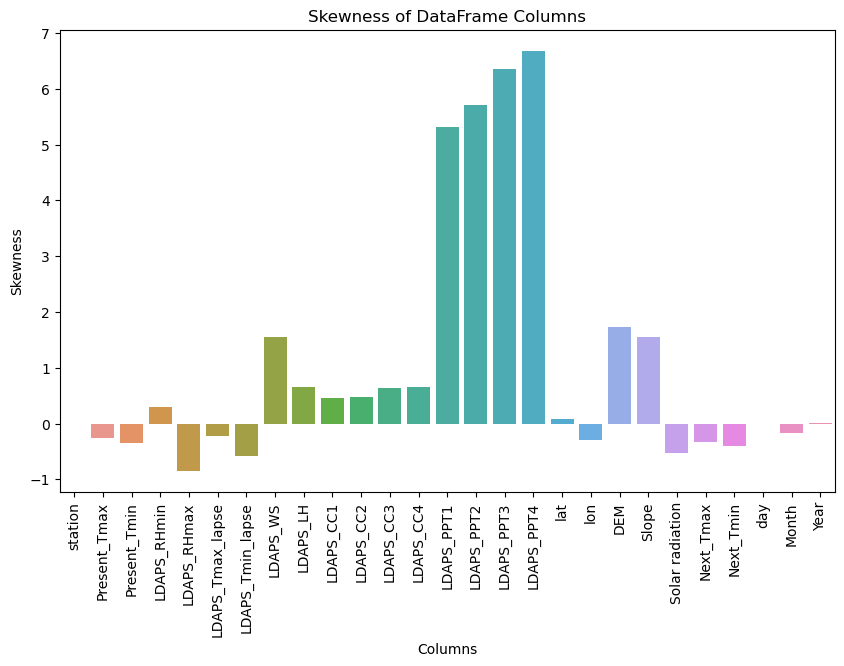

In [26]:
skewness = df.skew()
# Creating a bar plot for skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness)
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of DataFrame Columns')
plt.show()

# Removing Skewness

In [27]:
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

df_new.skew()

station            -0.206291
Present_Tmax       -0.036516
Present_Tmin       -0.014363
LDAPS_RHmin        -0.018008
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.012155
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.048221
LDAPS_CC2           0.047595
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.000000
lon                -0.202301
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
day                -0.217762
Month              -0.084425
Year                0.000000
dtype: float64

# Checking Outliers

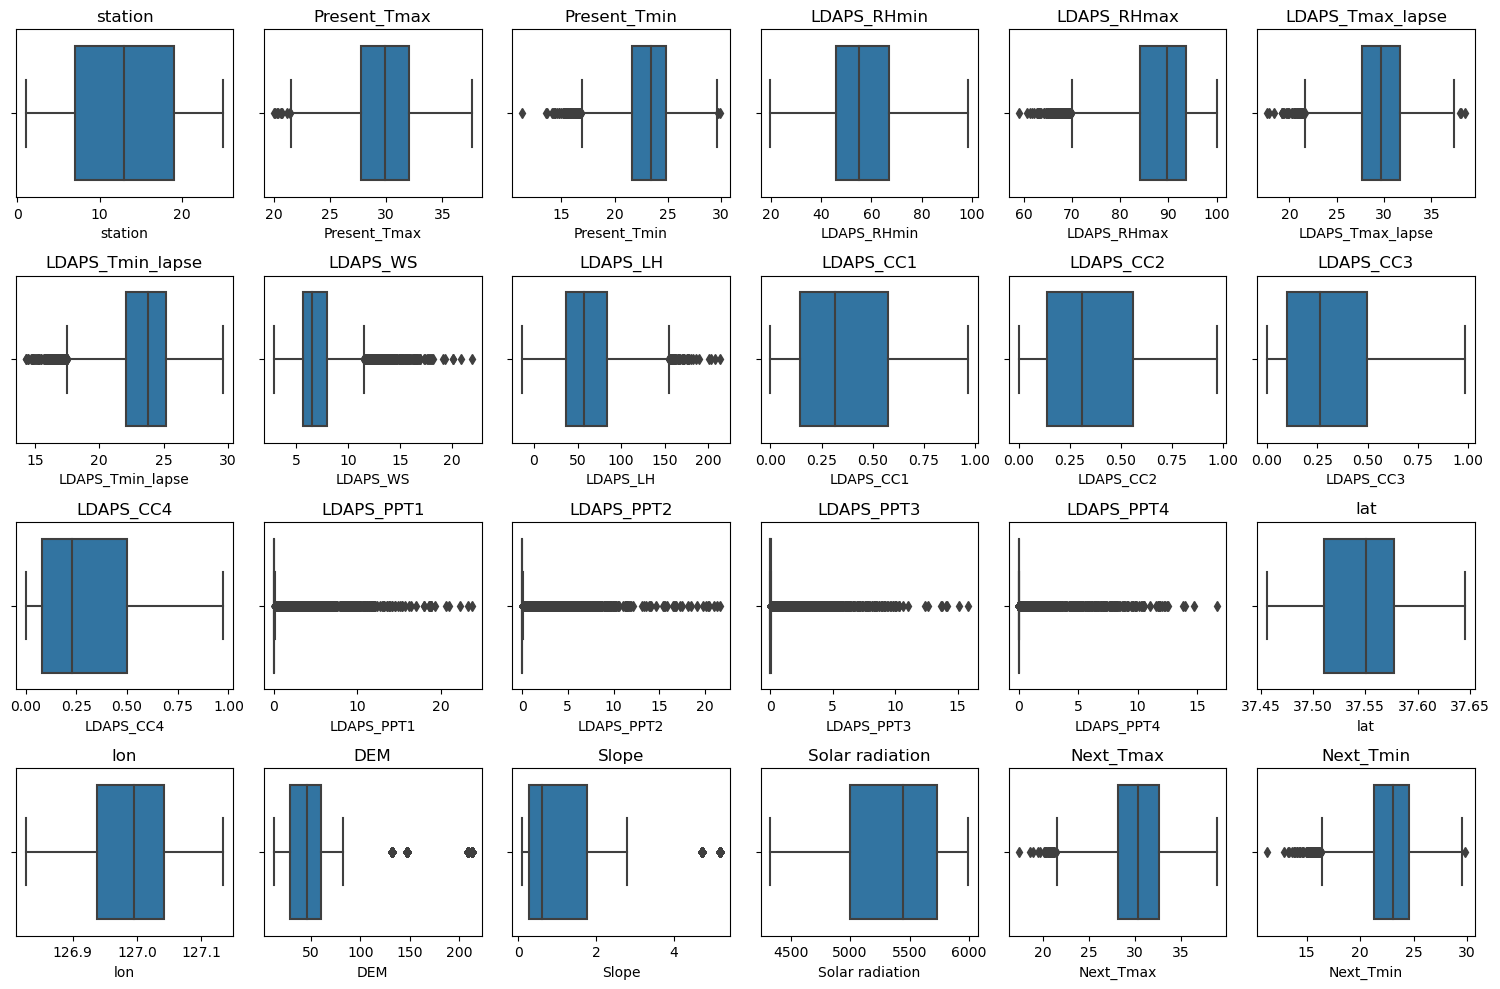

In [28]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols):
    plt.subplot(4, 6, i+1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


outliers are present in Maximum feature.

# Data Transformation

In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
transformed_data = scaler.fit_transform(x)


In [30]:
transformed_data

array([[-1.        , -0.28571429, -0.625     , ...,  0.875     ,
        -1.        , -1.        ],
       [-0.91666667,  0.47619048, -0.5625    , ...,  0.875     ,
        -1.        , -1.        ],
       [-0.83333333,  0.4047619 , -0.03125   , ...,  0.875     ,
        -1.        , -1.        ],
       ...,
       [ 0.83333333, -1.57142857, -1.96875   , ...,  0.875     ,
         1.        ,  1.        ],
       [ 0.91666667, -1.57142857, -1.78125   , ...,  0.875     ,
         1.        ,  1.        ],
       [ 1.        , -1.5952381 , -1.875     , ...,  0.875     ,
         1.        ,  1.        ]])

# Scaling The Feature

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.66460654, -0.35331763, -0.74802891, ...,  1.57877772,
        -2.77335883, -1.41176669],
       [-1.52605214,  0.72513836, -0.66472063, ...,  1.57877772,
        -2.77335883, -1.41176669],
       [-1.38749775,  0.62403311,  0.0433998 , ...,  1.57877772,
        -2.77335883, -1.41176669],
       ...,
       [ 1.38359018, -2.17321212, -2.53915704, ...,  1.57877772,
         1.01021665,  1.42353686],
       [ 1.52214457, -2.17321212, -2.28923218, ...,  1.57877772,
         1.01021665,  1.42353686],
       [ 1.66069897, -2.20691387, -2.41419461, ...,  1.57877772,
         1.01021665,  1.42353686]])

# Data preprocessing:

In [32]:
# creating train test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [33]:
x.shape

(7588, 25)

In [34]:
x_train.shape

(5311, 25)

In [35]:
x_test.shape

(2277, 25)

In [36]:
y_train.shape

(5311, 2)

In [37]:
y_test.shape

(2277, 2)

# Model Training

# Linear Regressor

In [38]:
from sklearn.linear_model import LinearRegression
from math import sqrt


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model with the training data
model.fit(x_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(x_test)

# Evaluate the model
# For instance, you can use metrics like Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1.5141322305277862
R-squared: 0.8118126225058221
Root Mean Squared Error: 1.2305008047651924


# RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Fit the model
rf_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(x_test)
# Calculate MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R-squared:", r2_rf)

# Calculate RMSE
rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest Root Mean Squared Error:", rmse_rf)

Random Forest Mean Squared Error: 0.7901157380324964
Random Forest R-squared: 0.8987834239417043
Random Forest Root Mean Squared Error: 0.8888845470771197


# DecionTree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor


# Create a Decision Tree Regressor instance
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model
dt_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(x_test)

# Calculate MSE
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Mean Squared Error:", mse_dt)

# Calculate R-squared
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree R-squared:", r2_dt)

# Calculate RMSE
rmse_dt = sqrt(mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Root Mean Squared Error:", rmse_dt)


Decision Tree Mean Squared Error: 1.8273627580149343
Decision Tree R-squared: 0.7657179975486259
Decision Tree Root Mean Squared Error: 1.3517998217247014


# KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor


# Create a KNN Regressor instance
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can modify n_neighbors as needed

# Fit the model
knn_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred_knn = knn_regressor.predict(x_test)

# Calculate MSE
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN Mean Squared Error:", mse_knn)

# Calculate R-squared
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN R-squared:", r2_knn)

# Calculate RMSE
rmse_knn = sqrt(mean_squared_error(y_test, y_pred_knn))
print("KNN Root Mean Squared Error:", rmse_knn)


KNN Mean Squared Error: 1.0454216952130004
KNN R-squared: 0.866392905648256
KNN Root Mean Squared Error: 1.0224586520798777


# Ridge Regression

In [42]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression instance
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the model
ridge_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_regressor.predict(x_test)

# Calculate MSE
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Mean Squared Error:", mse_ridge)

# Calculate R-squared
r2_ridge = ridge_regressor.score(x_test, y_test)
print("Ridge R-squared:", r2_ridge)

# Calculate RMSE
rmse_ridge = sqrt(mse_ridge)
print("Ridge Root Mean Squared Error:", rmse_ridge)


Ridge Mean Squared Error: 1.5142157480473082
Ridge R-squared: 0.8118004045389324
Ridge Root Mean Squared Error: 1.2305347406909357


# Cross Validation Score

In [43]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5))
]

for name, model in models:
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
    positive_mse_scores = -cv_scores  # Convert to positive as it returns negative MSE
    rmse_scores = [sqrt(mse) for mse in positive_mse_scores]  # Calculate RMSE from MSE
    print(f"{name} - Cross-Validation RMSE Scores:", rmse_scores)
    print(f"{name} - Mean RMSE:", sum(rmse_scores) / len(rmse_scores))


Linear Regression - Cross-Validation RMSE Scores: [1.3698367318891955, 1.4265959744044032, 1.2866956745236773, 1.3483472655283588, 1.5427256058156196]
Linear Regression - Mean RMSE: 1.394840250432251
Ridge Regression - Cross-Validation RMSE Scores: [1.367788013776492, 1.4267534898598997, 1.2864235632944219, 1.3483364771845914, 1.5426175592096272]
Ridge Regression - Mean RMSE: 1.3943838206650063
Random Forest - Cross-Validation RMSE Scores: [1.3499337357474597, 1.4847133034845936, 1.3711191988219442, 1.3992453841349888, 1.476078755270209]
Random Forest - Mean RMSE: 1.416218075491839
Decision Tree - Cross-Validation RMSE Scores: [1.9608612759056938, 1.9666630378921883, 1.8586123998028532, 1.9350767641255657, 2.0261409621292223]
Decision Tree - Mean RMSE: 1.949470887971105
KNN - Cross-Validation RMSE Scores: [1.5996452175824438, 1.9602079021784513, 1.7567183668106419, 1.9550358213146877, 1.6844257709922565]
KNN - Mean RMSE: 1.791206615775696


# Model Outcome 

In [44]:
model_results = {
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'KNN', 'Ridge'],
    'Mean R-squared': [0.8118, 0.8988, 0.7657, 0.8664, 0.8118],
    'Mean MSE': [1.5141, 0.7901, 1.8274, 1.0454, 1.5142],
    'Mean RMSE': [1.2305, 0.8889, 1.3518, 1.0225, 1.2305],
    'Cross-Validation RMSE Scores': [1.394840250432251, 1.3943838206650063, 1.416218075491839, 1.949470887971105, 1.791206615775696]

}

model_results_df = pd.DataFrame(model_results)
model_results_df


,Model,Mean R-squared,Mean MSE,Mean RMSE,Cross-Validation RMSE Scores
0,Linear Regression,0.8118,1.5141,1.2305,1.394840
1,Random Forest,0.8988,0.7901,0.8889,1.394384
2,Decision Tree,0.7657,1.8274,1.3518,1.416218
3,KNN,0.8664,1.0454,1.0225,1.949471
4,Ridge,0.8118,1.5142,1.2305,1.791207


R-squared: 
    
    A higher R-squared generally indicates a better fit. In this case, the "Random Forest" model has the highest R-squared (0.8988), suggesting it may be the best in terms of explaining the variance in the data.
    

Mean Squared Error (MSE): 
    
    A lower MSE is better. The "Random Forest" model has the lowest MSE (0.7901), which is indicative of better predictions, given this metric.
    

Root Mean Squared Error (RMSE): 
    
    Similar to MSE, lower RMSE values are better. Again, the "Random Forest" model has the lowest RMSE (0.8889).

Based on Mean RMSE and Cross-Validation Mean RMSE Scores, the Random Forest model seems to perform the best.

# Hyper parameter Tuning

# save the model

In [59]:
import pickle
filename = 'temp_forecast.pkl'
pickle.dump(rf_regressor, open(filename, 'wb'))

# Final Prediction

In [63]:
# Predict on the test set
y_pred = rf_regressor.predict(x_test)

# Considering -1 and -2 columns correspond to 'Next_Tmin' and 'Next_Tmax'
next_tmin_index = -1
next_tmax_index = -2

# Create the DataFrame
final_prediction = pd.DataFrame({
    'Prediction(Next_Tmin)': y_pred[:, next_tmin_index],
    'Next_Tmin': y_test.iloc[:, next_tmin_index],
    'Prediction(Next_Tmax)': y_pred[:, next_tmax_index],
    'Next_Tmax': y_test.iloc[:, next_tmax_index]
})

# Display predictions for both 'Next_Tmin' and 'Next_Tmax'
final_prediction

,Prediction(Next_Tmin),Next_Tmin,Prediction(Next_Tmax),Next_Tmax
5226,25.148,24.5,29.453,28.7
6269,21.722,21.5,26.631,27.8
1777,23.393,24.7,33.280,33.6
1486,23.271,22.5,27.520,25.5
591,23.125,23.3,29.012,29.4
...,...,...,...,...
6517,23.806,22.2,32.818,32.7
5808,25.343,24.9,33.935,34.7
1226,24.560,23.7,32.782,32.6
3483,20.763,21.1,29.011,28.6


# Visualization

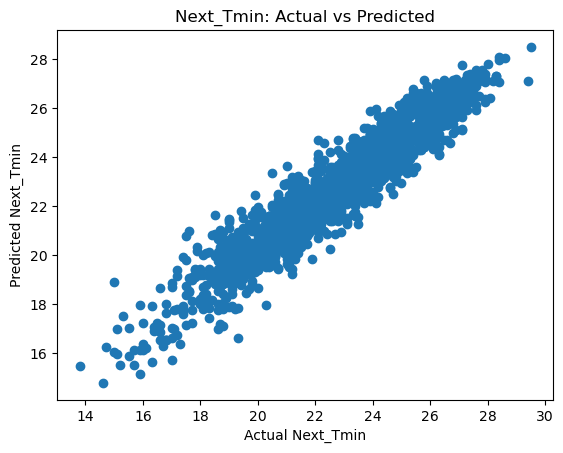

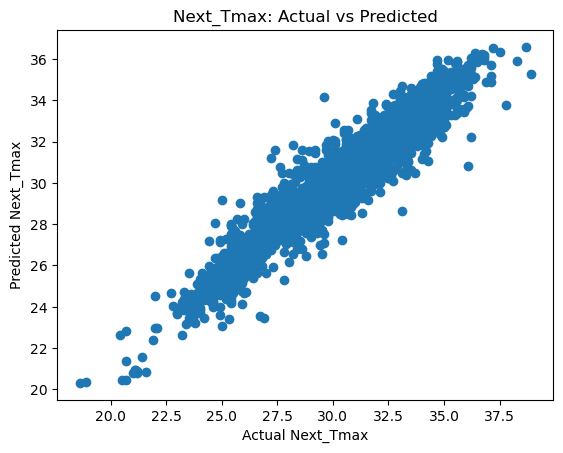

In [64]:
# Plot for Next_Tmin
plt.scatter(final_prediction['Next_Tmin'], final_prediction['Prediction(Next_Tmin)'])
plt.xlabel('Actual Next_Tmin')
plt.ylabel('Predicted Next_Tmin')
plt.title('Next_Tmin: Actual vs Predicted')
plt.show()

# Plot for Next_Tmax
plt.scatter(final_prediction['Next_Tmax'], final_prediction['Prediction(Next_Tmax)'])
plt.xlabel('Actual Next_Tmax')
plt.ylabel('Predicted Next_Tmax')
plt.title('Next_Tmax: Actual vs Predicted')
plt.show()
